In [1]:
import numpy as np
import xarray as xr
import xmitgcm.llcreader as llcreader
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#3D plot
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
## read in 3D data from public portal (you don't have to download!)
model = llcreader.ECCOPortalLLC2160Model()

In [3]:
## get Theta
ds_sst = model.get_dataset(varnames=['Theta'], type='latlon')
ds_sst

<xarray.Dataset> Size: 377TB
Dimensions:  (face: 13, i: 8640, i_g: 8640, j: 6480, j_g: 6480, k: 90, k_u: 90,
              k_l: 90, k_p1: 91, time: 18679)
Coordinates: (12/47)
  * face     (face) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 69kB 0 1 2 3 4 5 6 ... 8633 8634 8635 8636 8637 8638 8639
  * i_g      (i_g) int64 69kB 0 1 2 3 4 5 6 ... 8634 8635 8636 8637 8638 8639
  * j        (j) int64 52kB 0 1 2 3 4 5 6 ... 6473 6474 6475 6476 6477 6478 6479
  * j_g      (j_g) int64 52kB 0 1 2 3 4 5 6 ... 6474 6475 6476 6477 6478 6479
  * k        (k) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    ...       ...
    XG       (j_g, i_g) float32 224MB dask.array<chunksize=(6480, 2160), meta=np.ndarray>
    YG       (j_g, i_g) float32 224MB dask.array<chunksize=(6480, 2160), meta=np.ndarray>
    dxV      (j_g, i_g) float32 224MB dask.array<chunksize=(6480, 2160), meta=np.ndarray>
    dyU      (j_g, i_g) float32 224MB dask.array<chunksize=(6480, 2160), meta=np.ndarray>
    Zl       (k_l) >f4 360B dask.array<chunksize=(90,), meta=np.ndarray>
    Zu       (k_u) >f4 360B dask.array<chunksize=(90,), meta=np.ndarray>
Data variables:
    Theta    (time, k, j, i) float32 376TB dask.array<chunksize=(1, 1, 6480, 2160), meta=np.ndarray>

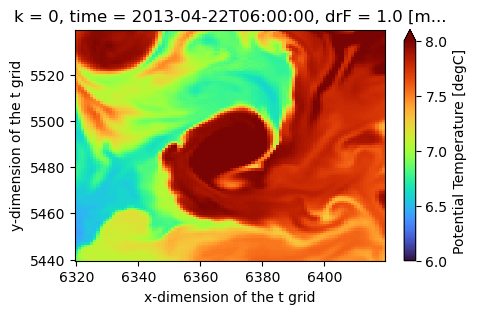

In [4]:
#an example of some nice ocean eddies off of BC
subset_vancouver = ds_sst.Theta.isel(k=0,time=-1,j=slice(5440,5540),i=slice(6320,6420))
plt.figure(figsize=(5, 3))
subset_vancouver.plot(vmin=6,vmax=8,cmap='turbo')

In [5]:
#xx = subset_vancouver.XC[0,:].values
#yy = subset_vancouver.YC[:,0].values
#subset_vancouver.plot(x=xx,y=yy,vmin=6,vmax=8,cmap='turbo')

In [6]:
subset = ds_sst.isel(time=-1,j=slice(5440,5540),i=slice(6320,6420),k=slice(0,40))
array = xr.DataArray(subset.Theta.data,dims=['depth','lat','lon'],coords={'depth':subset.Z.data,'lat':subset.YC[:,0].data,'lon':subset.XC[0,:].data})
#load the data to avoid streaming errors that sometimes pop up, also makes playing around with plots faster
array = array.load()

<Figure size 500x300 with 0 Axes>

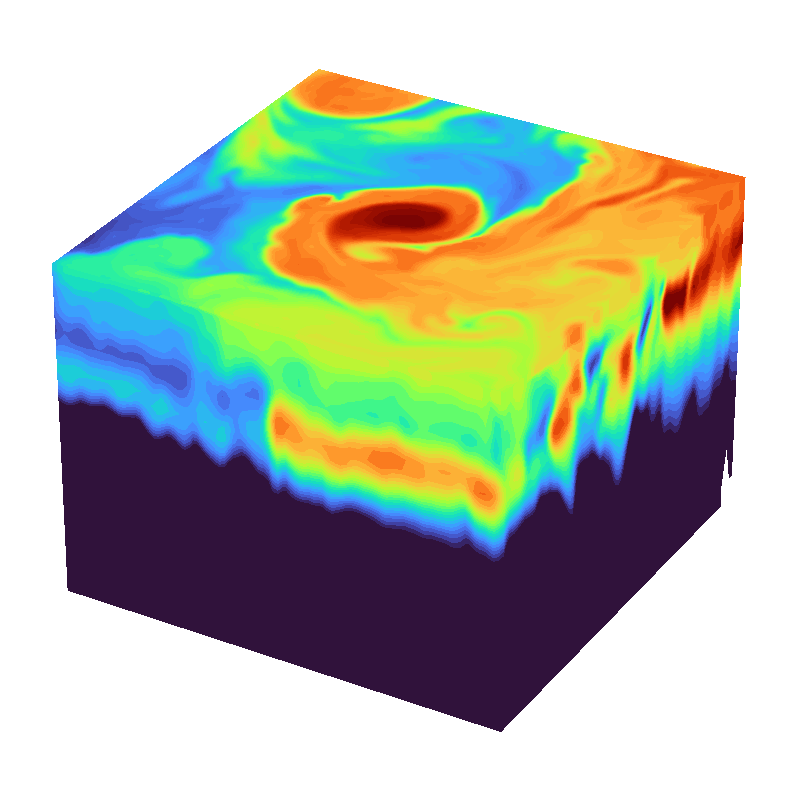

In [7]:
z_cut = array.isel(depth=0).data
x_cut = array.isel(lon=-1).data 
y_cut = array.isel(lat=0).data 
xx = array.lon
yy = array.lat
zz = array.depth

z_cut.shape

plt.figure(figsize=(5, 3))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap,vmin,vmax='turbo',6.3,8.5

#offset is used to shift it to the top of the cube
X,Y=np.meshgrid(xx,yy)
ax.contourf(X,Y,z_cut,60,zdir='z',offset=zz[0],cmap=cmap,vmin=vmin,vmax=vmax)
Y,Z=np.meshgrid(yy,zz)
ax.contourf(x_cut,Y,Z,60,zdir='x',offset=xx[-1],cmap=cmap,vmin=vmin,vmax=vmax) 
X,Z=np.meshgrid(xx,zz)
ax.contourf(X,y_cut,Z,60,zdir='y',offset=yy[0],cmap=cmap,vmin=vmin,vmax=vmax)

#ax.set_frame_on(True)
ax.set_zlim(zz[-1],zz[0])
ax.set_xlim(xx[0],xx[-1])
ax.set_ylim(yy[0],yy[-1])
#ax.plot([xx[0],xx[-1]],[yy[0],yy[0]],zs=zz[0],zdir='z',color='k') #tried to add edge to contourf plots but shows up underneath

plt.savefig('./figures/3D_ecco_axes2.png')
ax._axis3don = False
plt.savefig('./figures/3D_ecco_noaxes2.png')

Text(0, 0.5, 'Theta (K)')

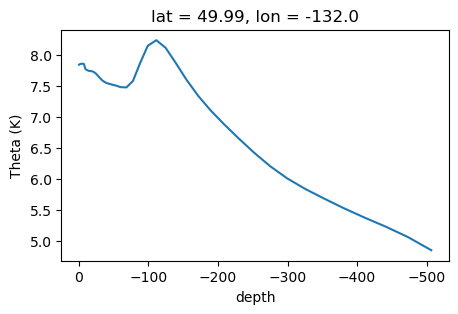

In [8]:
plt.figure(figsize=(5, 3))
#ax=array.sel(lat=50,lon=-132,method='nearest').plot(y='depth') #oceanographer view
ax=array.sel(lat=50,lon=-132,method='nearest').plot(xincrease=False) #greg likes this way better
plt.ylabel('Theta (K)')

# look around miami
25.7617° N, 80.1918° W

In [9]:
subset2 = ds_sst.isel(time=-1,j=slice(4550,4750),i=slice(7550,7800),k=slice(0,90))
array2 = xr.DataArray(subset2.Theta.data,dims=['depth','lat','lon'],coords={'depth':subset2.Z.data,'lat':subset2.YC[:,0].data,'lon':subset2.XC[0,:].data})
array2 = array2.load()

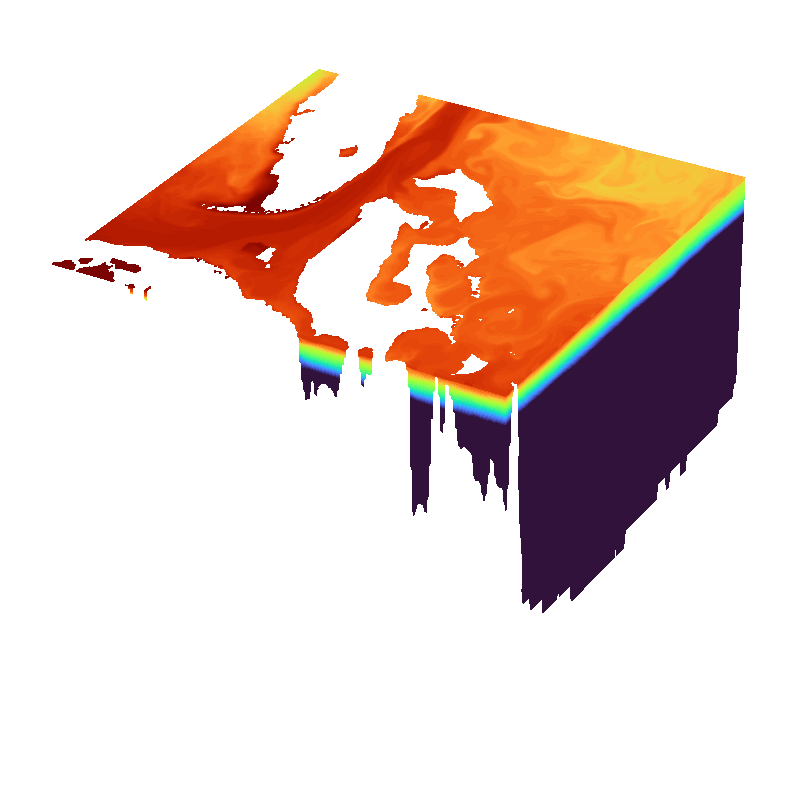

In [10]:
z_cut = array2.isel(depth=0).data
x_cut = array2.isel(lon=-1).data 
y_cut = array2.isel(lat=0).data 
xx = array2.lon
yy = array2.lat
zz = array2.depth

z_cut.shape

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap,vmin,vmax='turbo',12,28

#offset is used to shift it to the top of the cube
X,Y=np.meshgrid(xx,yy)
ax.contourf(X,Y,z_cut,60,zdir='z',offset=zz[0],cmap=cmap,vmin=vmin,vmax=vmax)
Y,Z=np.meshgrid(yy,zz)
ax.contourf(x_cut,Y,Z,60,zdir='x',offset=xx[-1],cmap=cmap,vmin=vmin,vmax=vmax) 
X,Z=np.meshgrid(xx,zz)
ax.contourf(X,y_cut,Z,60,zdir='y',offset=yy[0],cmap=cmap,vmin=vmin,vmax=vmax)

#ax.set_frame_on(True)
ax.set_zlim(zz[-1],zz[0])
ax.set_xlim(xx[0],xx[-1])
ax.set_ylim(yy[0],yy[-1])
#ax.plot([xx[0],xx[-1]],[yy[0],yy[0]],zs=zz[0],zdir='z',color='k') #tried to add edge to contourf plots but shows up underneath

plt.savefig('./figures/3D_miami.png')
ax._axis3don = False
plt.savefig('./figures/3D_miami.png')

Text(0, 0.5, 'Theta (K)')

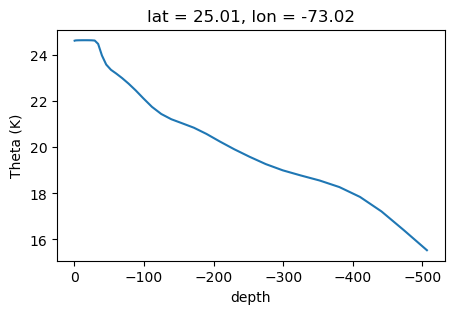

In [11]:
plt.figure(figsize=(5, 3))
#ax=array2.sel(lat=25,lon=-72,method='nearest').isel(depth=slice(0,40)).plot(y='depth') #oceanographer view
ax=array2.sel(lat=25,lon=-72,method='nearest').isel(depth=slice(0,40)).plot(xincrease=False) #greg likes this way better
plt.ylabel('Theta (K)')

Text(0, 0.5, 'Theta (K)')

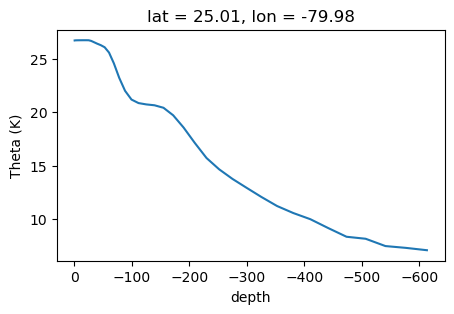

In [12]:
plt.figure(figsize=(5, 3))
down_data = array2.sel(lat=25,lon=-80,method='nearest')
down_data["depth"] = down_data["depth"].astype(np.float32) #convert depth to float32
#ax=array2.sel(lat=25,lon=-80,method='nearest').plot(y='depth')
ax=down_data.plot(xincrease=False)
plt.ylabel('Theta (K)')

Text(0, 0.5, 'Theta (K)')

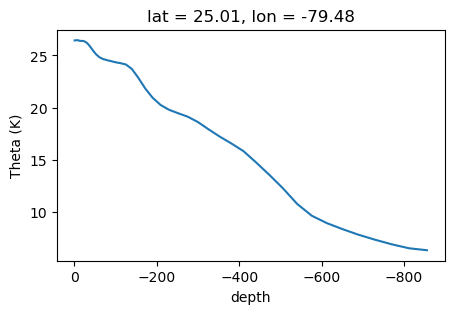

In [13]:
plt.figure(figsize=(5, 3))
up_data = array2.sel(lat=25,lon=-79.5,method='nearest')
up_data["depth"] = up_data["depth"].astype(np.float32) #convert depth to float32
ax=up_data.plot(xincrease=False)
plt.ylabel('Theta (K)')

In [14]:
# down_data ends at index 43 (bottom of ocean at this point)
# up_data is a bit deeper
print('DOWN, max depth = ', down_data.depth.isel(depth=43).data)
print(down_data.isel(depth=slice(0,43)).data)
print('UP, max depth = ', up_data.depth.isel(depth=43).data)
print(up_data.isel(depth=slice(0,49)).data)
print('UP, to depth with same temp, max depth = ', up_data.depth.isel(depth=45).data)
print(up_data.isel(depth=45).data)

DOWN, max depth =  -650.855
[26.75346   26.762648  26.766216  26.768465  26.7703    26.771883
 26.77329   26.774548  26.775614  26.77631   26.776001  26.771868
 26.710356  26.588114  26.45153   26.315426  26.115936  25.617859
 24.60898   23.249718  22.024963  21.203745  20.873169  20.749676
 20.666618  20.432837  19.72861   18.580511  17.146385  15.713582
 14.655074  13.751731  12.917609  12.054529  11.20865   10.545829
  9.968142   9.1414995  8.319786   8.131901   7.445831   7.276191
  7.055464 ]
UP, max depth =  -650.855
[26.447124  26.455112  26.459427  26.462715  26.46546   26.46747
 26.46611   26.409172  26.404165  26.402342  26.394083  26.346882
 26.240053  26.049688  25.767246  25.438543  25.10853   24.84354
 24.671223  24.5617    24.465773  24.352423  24.262907  24.1377
 23.709667  22.862787  21.836676  20.938055  20.245295  19.7796
 19.4517    19.122217  18.612396  17.914803  17.216785  16.552444
 15.810693  14.717357  13.528942  12.227614  10.731731   9.598539
  8.889584   8.

Text(-400, 22, 'Up')

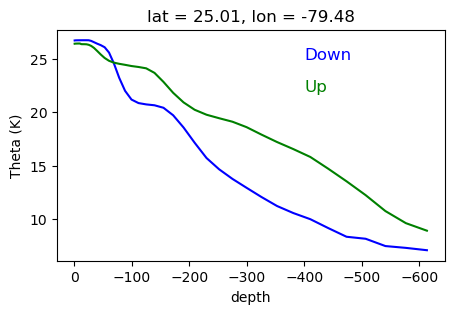

In [15]:
plt.figure(figsize=(5, 3))
ax=down_data[0:43].plot(xincrease=False,color='blue')
ax=up_data[0:43].plot(xincrease=False,color='green')
plt.ylabel('Theta (K)')
plt.text(-400, 25, "Down", color="blue", fontsize=12)
plt.text(-400, 22, "Up", color="green", fontsize=12)

Text(-400, 22, 'Up')

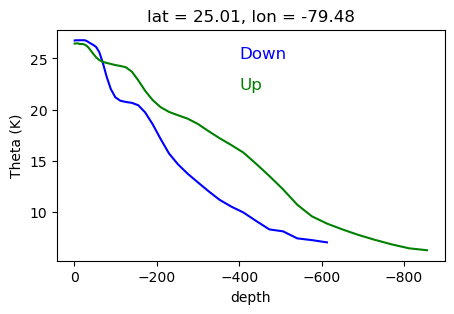

In [16]:
plt.figure(figsize=(5, 3))
ax=down_data[0:43].plot(xincrease=False,color='blue')
ax=up_data[0:49].plot(xincrease=False,color='green')
plt.ylabel('Theta (K)')
plt.text(-400, 25, "Down", color="blue", fontsize=12)
plt.text(-400, 22, "Up", color="green", fontsize=12)

# Interpolation

 .interp(n=5400)  #first part (going down)  
 .interp(n=1800)  #second part (going up)  
 we may want to go up in a different area  


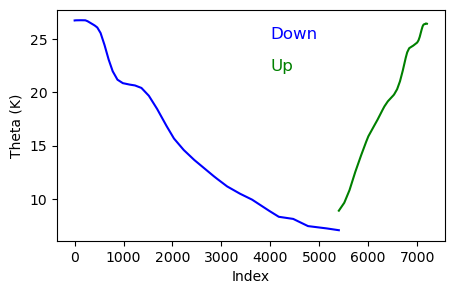

In [17]:
#in this we go to -650m for both down and up
# figure will show discontinuity in temperatures
i1=0; i2=43;
tem = down_data[i1:i2]
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,5400)
down_data2 = tem.interp(depth=depth_new)

i1=0; i2=43;
tem = up_data[i1:i2]
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,1800)
up_data2 = tem.interp(depth=depth_new)

plt.figure(figsize=(5, 3))
plt.plot(np.linspace(0,5400,5400),down_data2,color='blue')
tem = up_data2.isel(depth=slice(None, None, -1))
plt.plot(np.linspace(5400,5400+1800,1800),tem,color='green')
plt.ylabel('Theta (K)')
plt.xlabel('Index')
plt.text(4000, 25, "Down", color="blue", fontsize=12)
plt.text(4000, 22, "Up", color="green", fontsize=12)

#save data
data_bottom_same_depths = xr.concat([down_data2,tem],dim='depth')

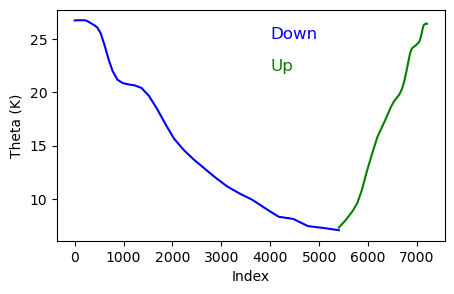

In [18]:
#in this we go to -650 for down and -710 for up
# figure will show a SMALLER discontinuity in temperatures
i1=0; i2=43;
tem = down_data[i1:i2]
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,5400)
down_data2 = tem.interp(depth=depth_new)

i1=0; i2=46;
tem = up_data[i1:i2]
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,1800)
up_data2 = tem.interp(depth=depth_new)

plt.figure(figsize=(5, 3))
plt.plot(np.linspace(0,5400,5400),down_data2,color='blue')
tem = up_data2.isel(depth=slice(None, None, -1))
plt.plot(np.linspace(5400,5400+1801,1800),tem,color='green')
plt.ylabel('Theta (K)')
plt.xlabel('Index')
plt.text(4000, 25, "Down", color="blue", fontsize=12)
plt.text(4000, 22, "Up", color="green", fontsize=12)

#save data
data_bottom_diff_depths = xr.concat([down_data2,tem],dim='depth')

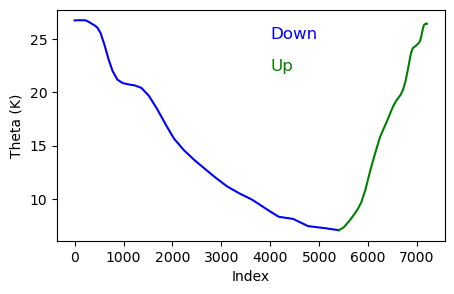

In [19]:
#in this we go to -650 for down and -710 for up
# figure will show almost no jump at the bottom 
# I went one step deeper, added the lowest temp, then interpolated
i1=0; i2=43;
tem = down_data[i1:i2]
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,5400)
down_data2 = tem.interp(depth=depth_new)
lowest = down_data2[-1].data #save lowest value

i1=0; i2=47;
tem = up_data[i1:i2]
tem[-1]=lowest
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,1800)
up_data2 = tem.interp(depth=depth_new)

plt.figure(figsize=(5, 3))
plt.plot(np.linspace(0,5400,5400),down_data2,color='blue')
tem = up_data2.isel(depth=slice(None, None, -1))
plt.plot(np.linspace(5400,5400+1801,1800),tem,color='green')
plt.ylabel('Theta (K)')
plt.xlabel('Index')
plt.text(4000, 25, "Down", color="blue", fontsize=12)
plt.text(4000, 22, "Up", color="green", fontsize=12)

#save data
data_bottom_smoothed = xr.concat([down_data2,tem],dim='depth')

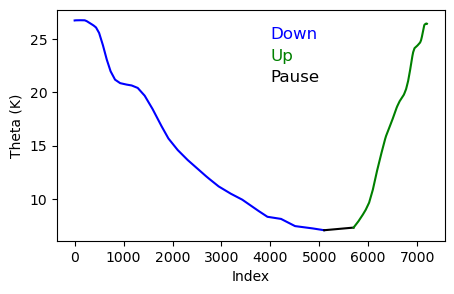

In [20]:
#in this we go to -650 for down and -710 for up
# figure will show almost no jump at the bottom 
# I went one step deeper, added the lowest temp, then interpolated
# Adding a pause at the bottom
i1=0; i2=43;
tem = down_data[i1:i2]
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,5100)
down_data2 = tem.interp(depth=depth_new)
down_lowest = down_data2[-1].data #save lowest value

i1=0; i2=46;
tem = up_data[i1:i2]
depth_new=np.linspace(tem.depth[0].data,tem.depth[-1].data,1500)
up_data2 = tem.interp(depth=depth_new)
up_lowest = up_data2[-1].data #save lowest value

i1=0; i2=600;
tem = down_data2[i1:i2].copy()
depth_new=np.linspace(down_data2.depth[-1].data,up_data2.depth[-1].data,600)
temp_new=np.linspace(down_lowest,up_lowest.data,600)
middle_data = tem
middle_data['depth']=depth_new #set depth all to deepest point
middle_data[:]=temp_new #set temp to lowest temp

plt.figure(figsize=(5, 3))
plt.plot(np.arange(0,5100),down_data2.data,color='blue')
tem = middle_data
plt.plot(np.arange(0,600)+5100,tem,color='black')
tem = up_data2.isel(depth=slice(None, None, -1))
plt.plot(np.arange(0,1500)+5700,tem,color='green')
plt.ylabel('Theta (K)')
plt.xlabel('Index')
plt.text(4000, 25, "Down", color="blue", fontsize=12)
plt.text(4000, 23, "Up", color="green", fontsize=12)
plt.text(4000, 21, "Pause", color="black", fontsize=12)

#save data
data_bottom_pause = xr.concat(
    [down_data2,middle_data,up_data2.isel(depth=slice(None, None, -1))],
    dim='depth')

In [21]:
# Convert DataArray to DataFrame and SAVE to file
df = data_bottom_same_depths.to_dataframe()
df.to_csv("./data/data_bottom_same_depths.csv")

df = data_bottom_diff_depths.to_dataframe()
df.to_csv("./data/data_bottom_diff_depths.csv")

df = data_bottom_smoothed.to_dataframe()
df.to_csv("./data/data_bottom_smoothed.csv")

df = data_bottom_pause.to_dataframe()
df.to_csv("./data/data_bottom_pause.csv")


